# 02 - Understanding MRI data

Now that we know more about neuroimaging file formats, we will have a look at what's actually stored in these files

### Questions
- What are the MRI modalities?
- How is MRI data represented on our computer?

### Goals
- Load and inspect an MRI image
- Perform basic operations on MRI data

---

## MRI modalities and important terms

The most important types of MRI scans are anatomical, functional and diffusion scans. In this course we will be focussing on anatomical and functional images

We will go into this in more depth below, but up front: all MRI modalities can be boiled down to a **matrix of numbers** - just like an image on your computer. Also analogous to a digital image, a matrix representing an MR image consists of small building blocks: **voxels** (in the image below, a single voxel is highlighted in green). The equivalent of a voxel (cube) in 2D images is a pixel (square).

It's also important to note that a 3D image isn't acquired at once. Rather, it is acquired in a series of **slices** (see visualization below). A pre-definied number of slices then make up a **volume** - the 3D brain image. In fMRI we acquire multiple volumes across our experiments to see how brain activtiy (more precise: the BOLD response) changes over time.

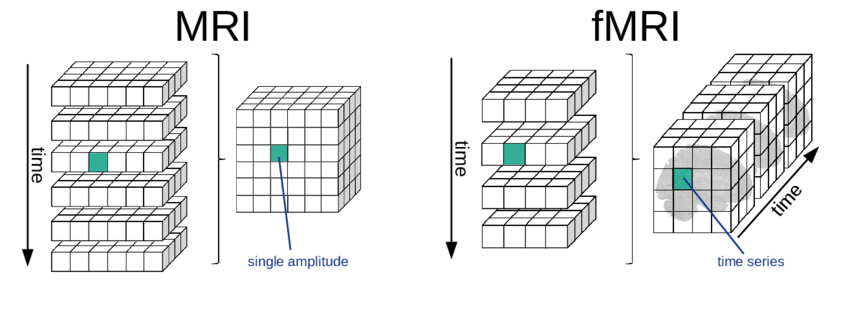

*Source: Jonas et al., 2018*

## Loading a NIfTI file

Alright, let's load some MRI data into Python!

First, we will create a data directory and download a sample dataset

In [1]:
# create data directory
!mkdir /data

# download dataset
!gdown 1jREp9F13CGM1XF20qczKreUPdGoJP_76
!unzip /content/ds000114.zip -d /data

Downloading...
From: https://drive.google.com/uc?id=1jREp9F13CGM1XF20qczKreUPdGoJP_76
To: /content/ds000114.zip
100% 95.9M/95.9M [00:01<00:00, 77.2MB/s]
Archive:  /content/ds000114.zip
   creating: /data/ds000114/
  inflating: /data/ds000114/dataset_description.json  
   creating: /data/ds000114/subjects/
  inflating: /data/ds000114/task-covertverbgeneration_bold.json  
  inflating: /data/ds000114/participants.tsv  
   creating: /data/ds000114/subjects/sub-01/
   creating: /data/ds000114/subjects/sub-02/
   creating: /data/ds000114/subjects/sub-03/
   creating: /data/ds000114/subjects/sub-01/ses-test/
   creating: /data/ds000114/subjects/sub-02/ses-test/
   creating: /data/ds000114/subjects/sub-03/ses-test/
   creating: /data/ds000114/subjects/sub-01/ses-test/anat/
   creating: /data/ds000114/subjects/sub-01/ses-test/func/
   creating: /data/ds000114/subjects/sub-02/ses-test/anat/
   creating: /data/ds000114/subjects/sub-02/ses-test/func/
   creating: /data/ds000114/subjects/sub-03/ses

In [2]:
subjects_dir = "/data/ds000114/subjects/"

To load the data into memory, we will use [NiBabel](https://nipy.org/nibabel/) - a package for reading and writing neuroimaging data. It's actually pre-installed in Google Colab so we don't need to use ```pip``` as for some other packages (e.g., nilearn, nipype)

In [3]:
import numpy as np
import nibabel as nib

To load information about a file into memory, we we can use NiBabel's ```load()``` function.

In [4]:
test_anat = nib.load(f"{subjects_dir}sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz")

In [5]:
print(type(test_anat))

<class 'nibabel.nifti1.Nifti1Image'>


As you can see by inspecting the output of the ```type()``` function, ```test_anat``` is now an instance of the ```Nifti1Image``` class. As for other objects in Python (e.g., lists, dictonaries, numpy arrays etc.) this gives access to a special set of attributes and methods. In Colab, you can have a look at all available class properties by putting a ```.```after the instance name and waiting a while. Also, you can find additional information by using ```?test_anat```

These properties allow us to access the main components of a NifTI file:



### 1. The [Header](https://nipy.org/nibabel/nibabel_images.html#the-image-header): Image metadata

The header contains important image metadata , such as the dimensions, voxel size or repetition time

In [6]:
test_header = test_anat.header
print(test_header)
print(type(test_header))

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 156 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.        1.        1.2993759 1.        0.009668  0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.049235623
quatern_c       : 0.005271982
quatern_d       : 0.020155331
qoffset_x       : -125.26386
qoffset_y 

The ```test_header``` is now a ```Nifti1Header``` object with its own attriuted and methods. You can for example get information about the voxel resolution.

In [7]:
print(test_header.get_xyzt_units())
print(test_header.get_zooms())

('mm', 'sec')
(1.0, 1.2993759, 1.0)


The first values provided by `get_zooms()` are the voxel sizes in milimeters, while the last value is the time between scans in seconds. Sometimes, this value might be in miliseconds - to check this, `get_xyzt_units()` can help us.

### 2. The data

To recap: As any image on our computer, MRI images are numerical data that represent the voxel's intensity. The equivalent of a voxel (cube) in 2D images is a pixel (square).

Note that by using ```nib.load()``` we haven't loaded the actual data into memory as this would be very inefficient if we did not need the data at all. To access the actual data, we can use the ```get_fdata()``` method:

In [8]:
test_data = test_anat.get_fdata()
print(type(test_data))
print(test_data)

<class 'numpy.ndarray'>
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ..

We can only see Zeros - is this array completely empty? Let's check the minumum and maximum:

In [9]:
print(np.min(test_data))
print(np.max(test_data))

0.0
2779.0


What do these numbers signify? The signal intensity of a specific voxel, the amplitude!

In [10]:
middle_voxels = test_data[126:129, 76:79, 126:129]
print(middle_voxels)

[[[326. 461. 485.]
  [ 65. 253. 426.]
  [105.  59. 155.]]

 [[369. 461. 462.]
  [190. 376. 465.]
  [ 89. 172. 366.]]

 [[437. 496. 480.]
  [374. 446. 460.]
  [290. 434. 497.]]]


In [23]:
print(test_data.shape)

(256, 156, 256)


The ```shape``` method reports to us that we have a file with 3 dimensions $(x, y, z)$ - exactly what we would have expected of a 3D image. These three dimensions (or axes) represent the space.

Before we dive deeper into this, let's also load a functional file into memory

In [24]:
test_func = nib.load(f"{subjects_dir}sub-01/ses-test/func/sub-01_ses-test_task-covertverbgeneration_bold.nii.gz")
func_data = test_func.get_fdata()
print(func_data.shape)

(64, 64, 30, 173)


As you can see, we are now dealing with a 4D image with the forth dimension representing the time. You can think this as a series of 3D images (volumes):

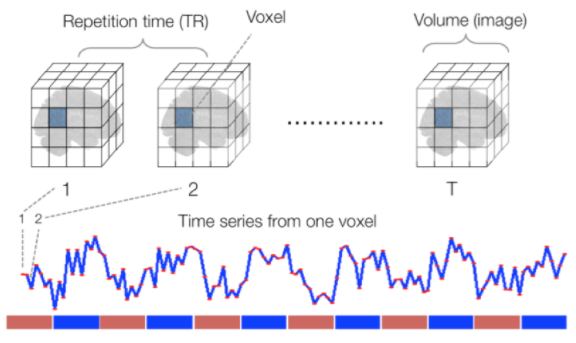


---

Our functional scan has 30 slices with a resolution of $64*64$ voxels. Thus, there are  $64 * 64 * 30 = 122880$ voxels. For each of these voxels we have 173 timepoints. That means, there are two ways to think about fMRI data:

1. A series of 3D volumes
2. 1D voxel timecourse


To extract a single 3D volume we would have to slice over the last axis (i.e., select a timepoint). To extraxt the timecourse of a particular voxel, we would have to provide a coordinate $(x, y, z)$, i.e., slice over the first three axes:



In [25]:
# extract the 50th volume (note Python indexing starts at 0)
volume_no50 = func_data[:, :, :, 49]
print(f"Shape of the 50th volume: {volume_no50.shape}")

# extract timecourse of random voxel
random_voxel_timecourse = func_data[20, 30, 10, :]
print(f"Shape of a random voxel's timecourse: {random_voxel_timecourse.shape}")

Shape of the 50th volume: (64, 64, 30)
Shape of a random voxel's timecourse: (173,)


In [28]:
print(random_voxel_timecourse)

[1871. 1447. 1381. 1432. 1444. 1390. 1427. 1416. 1429. 1452. 1402. 1400.
 1416. 1429. 1446. 1444. 1409. 1444. 1414. 1418. 1386. 1407. 1435. 1440.
 1403. 1413. 1443. 1458. 1417. 1389. 1408. 1438. 1455. 1463. 1416. 1429.
 1442. 1433. 1423. 1389. 1428. 1430. 1417. 1407. 1401. 1417. 1429. 1415.
 1419. 1391. 1392. 1426. 1430. 1440. 1438. 1412. 1406. 1428. 1439. 1425.
 1411. 1414. 1418. 1440. 1459. 1408. 1433. 1437. 1425. 1423. 1444. 1384.
 1395. 1411. 1422. 1426. 1376. 1412. 1419. 1443. 1408. 1412. 1430. 1432.
 1390. 1407. 1429. 1450. 1431. 1422. 1443. 1411. 1392. 1418. 1395. 1429.
 1419. 1409. 1412. 1428. 1436. 1431. 1439. 1454. 1459. 1406. 1444. 1422.
 1445. 1414. 1404. 1436. 1440. 1451. 1391. 1427. 1426. 1405. 1413. 1388.
 1408. 1429. 1438. 1437. 1401. 1405. 1427. 1438. 1448. 1478. 1407. 1401.
 1444. 1442. 1424. 1426. 1449. 1410. 1394. 1413. 1429. 1422. 1444. 1434.
 1426. 1396. 1404. 1426. 1426. 1446. 1394. 1418. 1435. 1478. 1405. 1409.
 1458. 1422. 1418. 1421. 1444. 1425. 1430. 1417. 14

We can easily visualize a voxel's timecourse by using matplotlib:

Text(0, 0.5, 'Signal Intensity')

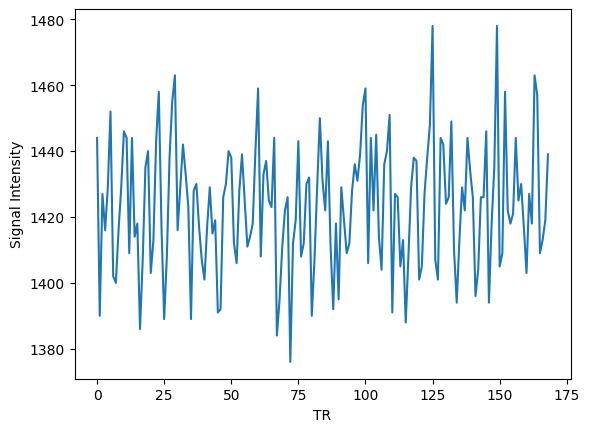

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(func_data[20, 30, 10, 4:]) # we drop the first 4 timepoints as they're outliers
plt.xlabel("TR")
plt.ylabel("Signal Intensity")

There are lots of other things that we can do with the data (e.g., correlate the voxel timecourse with something), but first, let's have a look at the last component of a NIfTI file: The affine matrix

---

### 3. The Affine: Position of the data in a reference space

As we've learned, each location in our image data array is a *voxel* that can be referred to with a *voxel coordinate* (array index). This is a useful way to look at the data, however, it tells us nothing about *where* something in the brain is located. For example, the voxel coordinate from above $(20,30,10)$ does not tell us whether the voxel position is on the left or right of the brain. That's what the affine matrix is for!

In a nutshell, the affine matrix is a way to translate our $x, y, z$ voxel coordinates to the real world (or: a standard reference space), i.e., to left/right, bottom/top, back/front. Below you can find the affine matrix for our test data.

In [ ]:
test_affine = test_func.affine
print(test_affine)

[[-3.99471426e+00 -2.04233140e-01  2.29353290e-02  1.30641693e+02]
 [-2.05448717e-01  3.98260689e+00 -3.10890853e-01 -9.74732285e+01]
 [ 6.95819734e-03  3.11659902e-01  3.98780894e+00 -8.06465759e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


With this matrix we can translate our data from the voxel space to a standard reference space - the most common reference space is called RAS+: the + indicates that Right (the subject's right), Anterior, Superior are all positive values on these axes. This real world space refers to the position of the voxels (in millimeters) relative to the scanner's isocenter (which is the $(0, 0, 0)$ coordinate).

We can translate a voxel coordinate to the real-world space by using matrix multiplication (with the ```@``` operator in numpy). Let's translate the middle voxel from the voxel space to coordinates in the RAS+ space:

In [ ]:
print(test_func.shape)
middle_vox = np.array([31, 31, 14, 1])

(64, 64, 30, 173)


In [ ]:
test_affine @ middle_vox

array([  0.79541833,  15.2662029 , -14.94008964,   1.        ])

The result of multipyling the affine matrix with the voxel coordinates tells us that the middle voxel is located 0.79mm to the right of the scanner's isocenter, 15.27mm anterior to it and 14.94mm inferior to it.

We won't go into much detail here as it is beyond the scope of our course, but the interested reader can find an excellent explanation of the affine [here](https://nipy.org/nibabel/coordinate_systems.html).

## Exercise

The goal of this exercise is to load a single subject's funcional data and calculate the mean timecourse of voxels that are above the 90th percentile of the functional mean data (thus, their signal intensity is above the 90th percentile of the functional mean data). This can be useful in situations where the image is not normalized to a brain template and we want to make sure that we're dealing with brain voxels. The exact steps are:

1. Load the functional data of the second subject using Nibabel
2. Remove the first 4 volumes (resulting shape should be ```(64, 64, 30, 169)```
3. Average the data across time (resulting shape should be ```(64, 64, 30)```
4. Calculate the voxel intensity of the 90th percentile of the averaged data (```np.percentile```)
5. In the averaged data, select the voxels with an intensity above the 90th and transfer these coordinates to the original functional data. Afterwards, calculate the mean timecourse.
6. Plot the resulting timecourse

Tips:

*   For (3), you can use the [`mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) function from the `numpy` module. You will need to specify the axis, as you are calculating the mean along an axis.
*   For (5), you will need to use boolean indexing. Once you selected each voxel with an intensity > 90th percentile, use the np.mean() function you used for (3) to calculate the timecourse.





In [ ]:
## Step 0: Import everything that's necessary and define variables
## (you don't need to change these)

import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

subject = "sub-02"
subjects_dir = "/data/ds000114/subjects/"


## Step 1: Get data & remove the first 4 volumes
data_func2 =
print(data_func2.shape) # this lets you check the shape


## Step 3: Average the data across time using np.mean()
mean_func2 =
print(mean_func2.shape) # this lets you check the shape


## Step 4: Calculate the voxel intensity of the mean data's 90th percentile using np.percentile()
mean_perc90 =


## Step 5: Calculate the mean timecourse of the voxels (using np.mean()) above the 90th percentile of the mean data
mean_ts_90 =


## Step 6: Plot everything (You don't need to change anything here)
plt.figure(figsize=(25,5))
plt.plot(mean_ts_90)
plt.xlabel("TR")
plt.ylabel("Signal Intensity")




### Bonus exercise

Refactor the above code into a function that takes path to a functional data as the only argument and returns the mean time series of the mean data voxels that are above the 90th percentile. Use this function in loop to visualize the time series for every subject.

Tip: Use the ```scale``` function from ```scikit-learn``` to return standardized time series.

## Resources

[Coordinate systems and affines](https://nipy.org/nibabel/coordinate_systems.html)

[Overview of Nibabel images](https://nipy.org/nibabel/nibabel_images.html#)

[Using Python for neuroimaging data](https://peerherholz.github.io/workshop_weizmann/data/data.html): Short notebooks showcasing how MRI data can be loaded, modified and saved using Nibabel and Nilearn

[NiPraxis: Images and code](https://textbook.nipraxis.org/what_is_an_image.html)

[Youtube Video: Essence of Linear Algebra](https://www.youtube.com/watch?v=fNk_zzaMoSs)

## References

Jonas, S. & Kutafina, E. & Györi, A. (2018). Correlation analysis and classification of simultaneously recorded resting-state EEG and fMRI data. 10.13140/RG.2.2.28331.49448.

Michael Joseph, Jerrold Jeyachandra, and Erin Dickie (eds):
"Data Carpentry: Introduction to MRI Data Analysis." Version 2019.11, November 2019,
https://github.com/carpentries-incubator/SDC-BIDS-IntroMRI


https://bic-berkeley.github.io/psych-214-fall-2016/voxel_time_courses.html